# Step 1: Installation and Setup

In [11]:
import tensorflow as tf

In [12]:
print(tf.__version__)

2.13.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [14]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

In [16]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [17]:
# apply padding
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [18]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3: Building the model

In [19]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [20]:
# Embedding layer
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))

In [21]:
# LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [22]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [25]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 52s 261ms/step - loss: 0.4566 - accuracy: 0.7875 - val_loss: 0.4344 - val_accuracy: 0.8200
Epoch 2/5
196/196 [==============================] - 52s 265ms/step - loss: 0.2861 - accuracy: 0.8848 - val_loss: 0.3941 - val_accuracy: 0.8234
Epoch 3/5
196/196 [==============================] - 53s 268ms/step - loss: 0.2274 - accuracy: 0.9125 - val_loss: 0.3790 - val_accuracy: 0.8454
Epoch 4/5
196/196 [==============================] - 53s 269ms/step - loss: 0.1870 - accuracy: 0.9310 - val_loss: 0.5081 - val_accuracy: 0.8223
Epoch 5/5
196/196 [==============================] - 57s 292ms/step - loss: 0.1548 - accuracy: 0.9442 - val_loss: 0.5785 - val_accuracy: 0.8111


In [26]:
# Model prediction
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for the positive class

# Convert predicted probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype("int32")

782/782 [==============================] - 24s 31ms/step


In [27]:
print(y_pred[15]), print(y_test[15])

[0]
0


(None, None)

In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10586  1914]
 [ 2809  9691]]


In [29]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.81108


# Step 5: Learning Curve

In [30]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

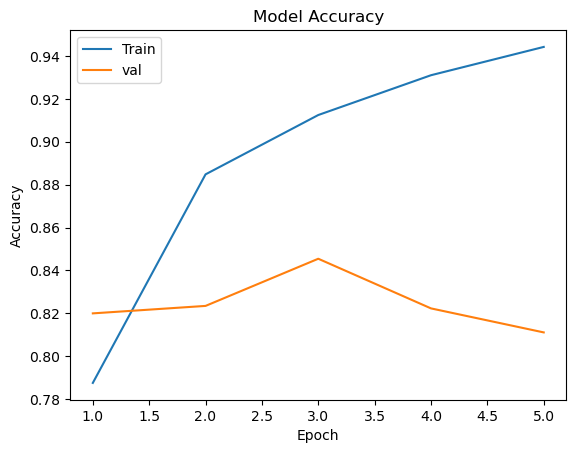

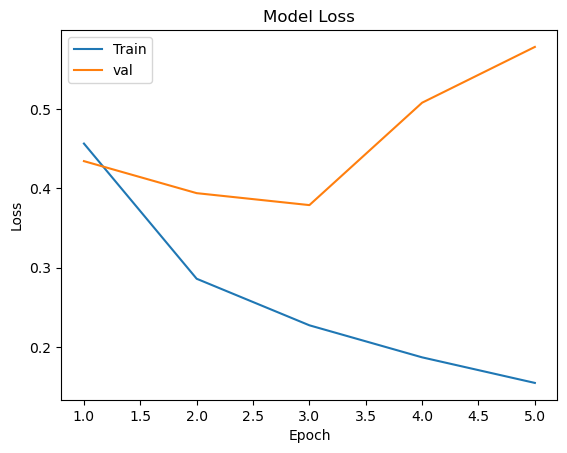

In [31]:
learning_curve(history, 5)